In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 


In [37]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber',axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
churn_df = churn_data.copy()
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [39]:
# Определение категориальных признаков
churn_df['Geography'] = churn_df['Geography'].astype('category')
churn_df['Gender'] = churn_df['Gender'].astype('category')
churn_df['HasCrCard'] = churn_df['HasCrCard'].astype('category')
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].astype('category')

churn_df['Exited'] = churn_df['Exited'].apply(lambda x: 'лояльный' if x == 0 else 'ушедший') #.astype('category')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int64   
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  object  
dtypes: category(4), float64(2), int64(5), object(2)
memory usage: 742.8+ KB


#### 9.1. Каково соотношение ушедших и лояльных клиентов? 

Покажите это на графике и дайте комментарий по соотношению.

In [40]:
exited_data = churn_df.groupby(by='Exited',as_index=False, observed=True).nunique()

fig = px.pie(
    exited_data,
    values='CustomerId',
    names='Exited',
    title= 'Соотношение ушедших и лояльных клиентов',
    height=400,
    width=500
    );

fig.update_traces(textposition='outside', 
                  textinfo='percent+label')
fig.update_layout(showlegend=False)

fig.show()

Из 10 тысяч рассматриваемых клиентов банка **более 20%** или 2 037 клиентов, отказались от услуг банка. 

### 9.2. Постройте график, 
- показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов
- опишите распределение и сделайте выводы.

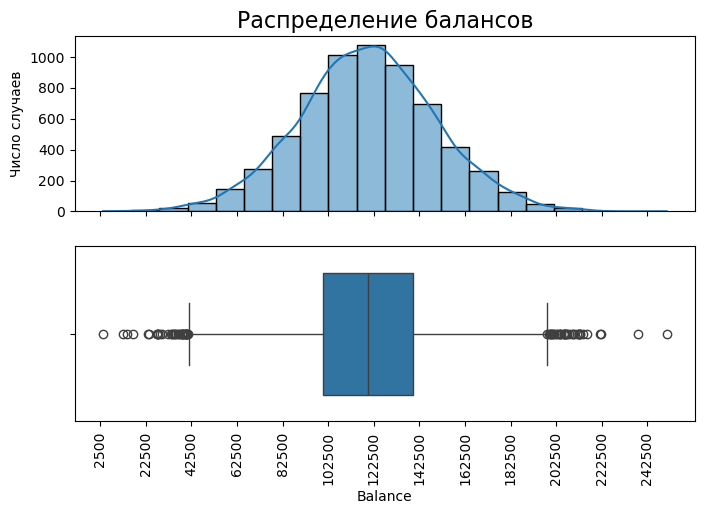

In [41]:
mask = churn_df['Balance'] > 2500
ower_balance = churn_df[mask]

fig, axes = plt.subplots(nrows=2, 
                         ncols=1, 
                         figsize =(8,5), 
                         gridspec_kw={'hspace': 0.2},
                         sharex=True)

sns.histplot(
        data=ower_balance,
        x='Balance',
        bins=20,
        kde=True,
        ax = axes[0]
        );
axes[0].set_title('Распределение балансов', fontsize=16)
axes[0].set_xlabel('Сумма баланса')
axes[0].set_ylabel('Число случаев')
#axes[0].set_xticks(range(2500, 250000, 20000))
#axes[0].xaxis.set_tick_params(rotation=90)

sns.boxplot(
        data=ower_balance,
        x='Balance',
        orient='h',
        width=0.7,
        ax=axes[1]
);
#axes[1].set_title('Распределение балансов свыше 2500')
axes[1].set_xticks(range(2500, 250000, 20000))
axes[1].xaxis.set_tick_params(rotation=90)


Если не учитывать вклады меньше 2500 долларов, то наибольшее количество вкладов распределилось между вкладами на сумму **102 500**  и **142 500** долларов. Средняя сумма вклада отмечена на уровне **122 500** доллара.

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 

- Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
- Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

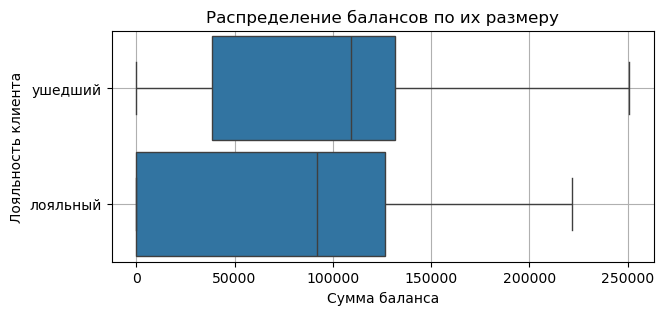

In [42]:
fig = plt.figure(figsize=(7, 3))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение балансов по их размеру');
boxplot.set_xlabel('Сумма баланса');
boxplot.set_ylabel('Лояльность клиента');
boxplot.grid()


Суммы на балансах ушедших более сконцентрированы, а так же характеризуются более крупными суммами, на что указывает правое положение медианы и более длинный правый ус.
Таким образом в категорию ушедших попадают более крупные клиенты.
Отток крупных вкладчиков может быть вызван:
- неудовлтворенностью последних условиями обслуживания
- отсутсвием выгодных предложений для пролонгации вкладов


### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
- В какой группе больше потенциальных выбросов? 
- На какую возрастную категорию клиентов стоит обратить внимание банку?

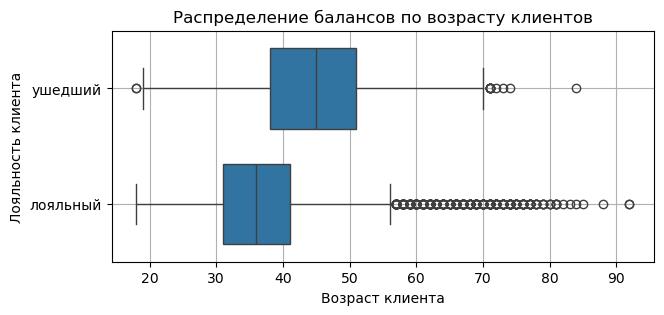

In [43]:
fig = plt.figure(figsize=(7,3))
me_box = sns.boxplot(
    data= churn_df,
    y='Exited',
    x='Age',
    width=0.7
)
me_box.set_title('Распределение балансов по возрасту клиентов')
me_box.set_xlabel('Возраст клиента')
me_box.set_ylabel('Лояльность клиента')
me_box.grid()

- Контингент ушедших клиентов является более возрастным, средний возраст ушедших 45 лет, средний возраст лояльных около 35 лет.
- В группе лояльных клиентов, наибольшее количество потенциальных выбросов - клиенты с возрастом от 55 лет и старше.
- Банку необходимо обратить внимание на возрастную категорию клиентов от 40 до 50 лет, так как таких клиентов больше всего в категории ушедших.

### 9.5. Постройте график,  
- который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
- Добавьте расцветку по признаку оттока клиентов. 
- Какова взаимосвязь между признаками? 
- Если не видите явной взаимосвязи, укажите это.

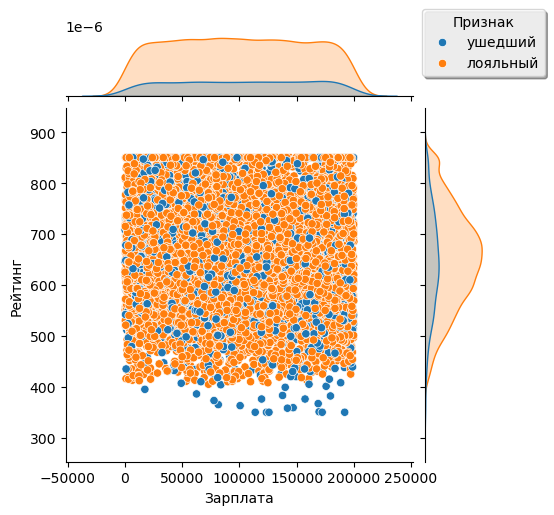

In [44]:
me_Corr = sns.jointplot(
    data = churn_df,
    y= 'CreditScore',
    x= 'EstimatedSalary',
    hue='Exited',
    height=5,
);
me_Corr.set_axis_labels("Зарплата", "Рейтинг");

# Получаем легенду и меняем её прозрачность
legend = me_Corr.ax_joint.legend_
legend.set_title ('Признак')
#legend.get_frame().set_alpha(0.5)  # прозрачность от 0 (невидимая) до 1 (полная видимость)
legend.set_loc('upper right')
legend.set_bbox_to_anchor((1.4,1.3))
legend.shadow=True
legend.set_zorder(100)


Диаграмма рассеивания указывает на отсутсвие связи между кредитным рейтингом и уровнем предполагаемой зарплаты.

Обращает на себя внимание, что ушли практически все клиенты банка с рейтингом ниже 400

### 9.6. Кто чаще уходит, 
- мужчины или женщины? 
- Постройте график, который иллюстрирует это.

*Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).*

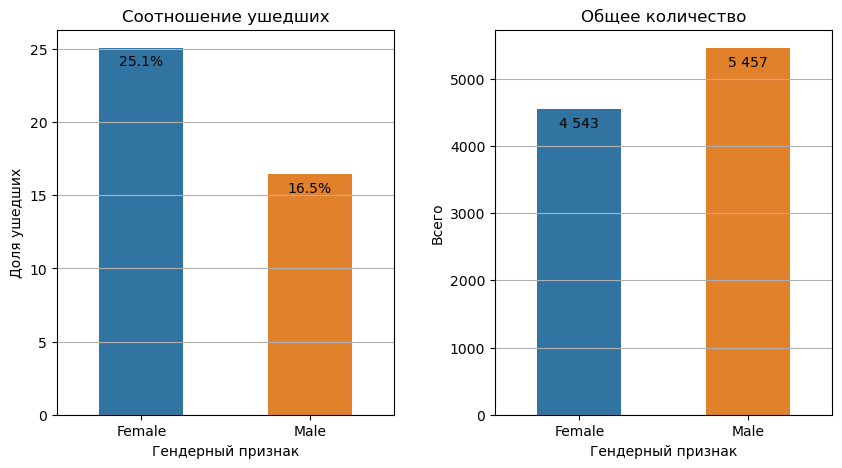

In [45]:
all_gender = churn_data.groupby('Gender')['CustomerId'].nunique() 
exit_gender = churn_data.groupby('Gender')['Exited'].mean()*100

fig, axes = plt.subplots(nrows=1, 
                         ncols=2, 
                         figsize=(10, 5), 
                         gridspec_kw={'wspace': 0.3},)

sns.barplot(data=exit_gender.reset_index(),
            x='Gender',
            y='Exited',
            hue='Gender',
            width=0.5,
            ax=axes[0]);

axes[0].bar_label(axes[0].containers[0], label_type='edge', padding=-15, fmt='%.1f%%')
axes[0].bar_label(axes[0].containers[1], label_type='edge', padding=-15, fmt='%.1f%%')
axes[0].set_title('Соотношение ушедших')
axes[0].set_xlabel('Гендерный признак')
axes[0].set_ylabel('Доля ушедших')
axes[0].grid(axis='y')

sns.barplot(data=all_gender.reset_index(), 
            x='Gender',
            y='CustomerId',
            hue='Gender',
            width=0.5,
            ax=axes[1]);

axes[1].bar_label(axes[1].containers[0], label_type='edge', padding=-15, fmt=lambda x: f'{x:,.0f}'.replace(',', ' '))
axes[1].bar_label(axes[1].containers[1], label_type='edge', padding=-15, fmt=lambda x: f'{x:,.0f}'.replace(',', ' '))
axes[1].set_title('Общее количество')
axes[1].set_xlabel('Гендерный признак')
axes[1].set_ylabel('Всего')
axes[1].grid(axis='y')

Не смотря на преобладание мужчин в общем количестве клиентов, чаще уходят женьщины.

Понятие "чаще" - это соотношение ушедших женьщин к их общему количеству

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 

Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

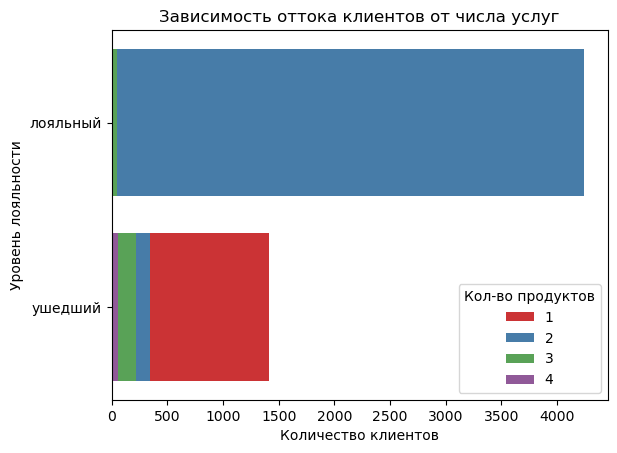

In [46]:
l_data = churn_df.groupby(['Exited','NumOfProducts'], observed=True)['CustomerId'].nunique().reset_index()
l_data = l_data.rename(columns={'CustomerId':'cnt_Customer'})

l_plot = sns.barplot(
    data=l_data,
    x='cnt_Customer',
    y='Exited',
    hue='NumOfProducts',
    dodge=False,
    palette='Set1'
    );

l_plot.set_title('Зависимость оттока клиентов от числа услуг')
l_plot.set_xlabel('Количество клиентов')
l_plot.set_ylabel('Уровень лояльности')

plt.legend(title = 'Кол-во продуктов');

Отток клиентов имеет обратную связь с количеством приобретенных услуг банка. 

Чем меньше приобретенных услуг, тем вероятнее уход клиента.

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 

- Постройте диаграмму, иллюстрирующую это. 
- Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

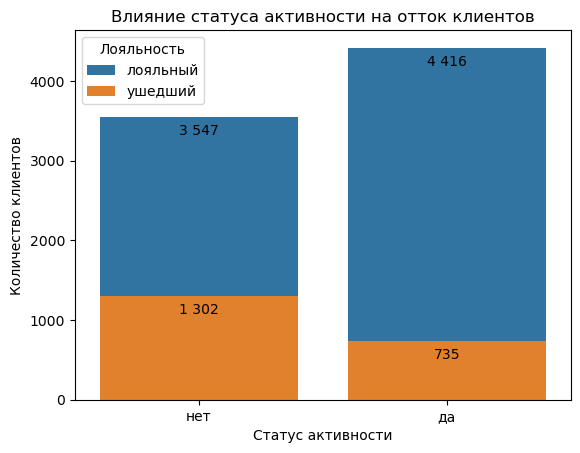

In [47]:

active_data = churn_df.groupby(['Exited','IsActiveMember'], observed=False)['CustomerId'].nunique().reset_index()
active_data = active_data.rename(columns={'CustomerId':'cnt_Customer'})
active_data['IsActiveMember'] = active_data['IsActiveMember'].apply(lambda x: 'да' if x == 1 else 'нет')

l_plot = sns.barplot(
    data=active_data,
    x='IsActiveMember',
    y='cnt_Customer',
    hue='Exited',
    dodge=False
    );

l_plot.set_title('Влияние статуса активности на отток клиентов')
l_plot.set_xlabel('Статус активности')
l_plot.set_ylabel('Количество клиентов')
l_plot.bar_label(l_plot.containers[0], label_type='edge', padding= -15, fmt=lambda x: f'{x:,.0f}'.replace(',', ' '))
l_plot.bar_label(l_plot.containers[1], label_type='edge', padding= -15, fmt=lambda x: f'{x:,.0f}'.replace(',', ' '))

plt.legend(title='Лояльность');

Практически 30% из числа ушедших клиентов имели статус неактивных. Что указывает на то что прекращение активности может являться первым признаком того что клиент может (или собирается) отказаться от услуг банка.

В качстве рекомендаций, банку можно посоветовать разработать дополнительную программу заинтересованности клиентов у которых отмечен статус не активного. Для работу на опережение, рассмотреть возможность выработки критериев характеризующих снижение активности клиента, что бы использвоать программу повышения заинтересованности раньше, чем клиент получит прекратит активность.

### 9.9. В какой стране доля ушедших клиентов больше? 
- Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
- Предположите, с чем это может быть связано.

In [48]:
exit_Geography = pivot_df = churn_data.pivot_table(
    values='CustomerId',
    index='Geography',
    columns='Exited',
    aggfunc='nunique'
)

exit_Geography['perc_Exited'] = round(exit_Geography.iloc[:,1]/exit_Geography.iloc[:,0]*100,2)

fig = px.choropleth(
    data_frame=exit_Geography, #Данные
    locations=exit_Geography.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='perc_Exited', #от чего зависит цвет
    title='Распределение ушедших клиентов', #заголовок
    range_color=[0, 50], #диапазон цвета
    width=800, #ширина
    height=500, #высота
    scope='europe',
    projection = 'orthographic',
    fitbounds="locations",
    color_continuous_scale='Blues' #палитра цветов
)
fig.update_layout(
    coloraxis_colorbar_title="Доля ушедших клиентов",
    coloraxis_colorbar_title_side="right")
#отображаем график
fig.show()

### Предположение

Ранее отмечено, что лояльность клиентов свзана с:
- размером баланса, чаще уходят более крупные клиенты
- возрастом клинта, чаще уходят клинты старше 45 лет
- полом клиента, чаще уходят женьщины
- количеством приобретенных услуг, чем меньше услуг, тем выше вероятность ухода
- с статусом активности, прекращение активности, указывает на высокую вероятность ухода
  
Практически все перечисленные критерии характеризуют клиентов из Германии (данные ниже).
- средний размер баланса выше чем в других странах, при этом разброс балансов ниже
- средний показатедль возраста клиентов немного выше чем в других странах
- более 50% клиентов, купили только 1 банковский продукт 
- в Германии наибольший процент жкньщин (48%), среди всех клиентов
  
Представленные данные можгут свидетельствовать о том, что именно клиенты из Германии оказывают ключевое влияние на причины оттока клиентов

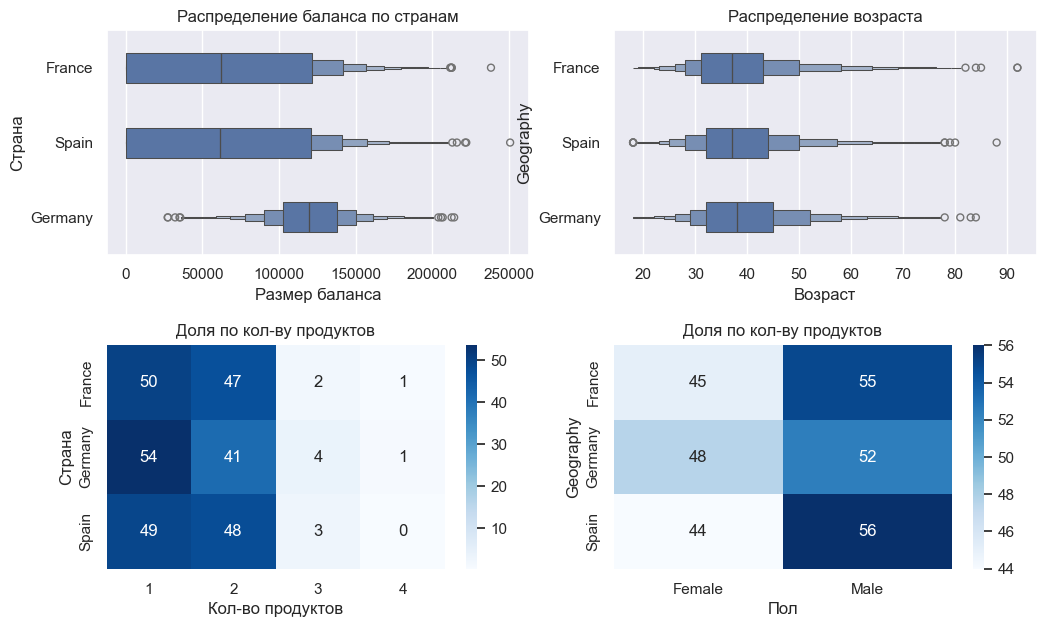

In [261]:
# Проверка критериев в разрезе географии клиентов

#Формула Расчет доли от общего по родительской группе
def add_Dol_Customer(p_src_data: pd.DataFrame, p_col_parent: [], p_col_children: []):

    p_col_by  = [*p_col_parent, *p_col_children]
    
    #Расчет общего количества клиентов по странам
    sum_data = p_src_data.groupby(p_col_parent)['CustomerId'].nunique()
    
    #подсчет количества клиентов по странам с учетом гендерного признака
    res_data = p_src_data.groupby(p_col_by)['CustomerId'].nunique().reset_index()
    res_data = res_data.rename(columns={'CustomerId':'cnt_Customer'})

    #Свод полученных данных о количестве клиентов
    res_data = res_data.merge(geo_sum,
                              on=p_col_parent,
                              how='left')

    #Расчет доли клиентов по количеству купленных пролуктов в каждой стране
    res_data['dol_Customer'] = round(res_data['cnt_Customer']/res_data['CustomerId']*100,2)
    res_data = res_data.drop('CustomerId',axis=1)

    return res_data


fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         #constrained_layout=True,
                         figsize=(12,7),
                         #sharey=True,
                         gridspec_kw={'hspace': 0.4},
                         );

sns.boxenplot(data=churn_data,
              y='Geography',
              x='Balance',
              width=0.4,
              ax=axes[0, 0]
              );
axes[0, 0].set_title('Распределение баланса по странам')
axes[0, 0].set_xlabel('Размер баланса');
axes[0, 0].set_ylabel('Страна')

sns.boxenplot(data=churn_data,
              y='Geography',
              x='Age',
              width=0.4,
              ax=axes[0, 1]
              );
axes[0, 1].set_title('Распределение возраста')
axes[0, 1].set_xlabel('Возраст');

geo_prod = add_Dol_Customer(p_src_data=churn_data,
                            p_col_parent=['Geography'],
                            p_col_children=['NumOfProducts'],
                            )

geo_prod = geo_prod.pivot(index="Geography", columns="NumOfProducts", values="dol_Customer")

#Визуализация доли клиентов в зависимости от количества купленных продуктов
sns.heatmap(
    data=geo_prod,
    cmap='Blues',
    annot=True,
    fmt='.0f',
    ax=axes[1, 0]
    );
axes[1, 0].set_title('Доля по кол-ву продуктов')
axes[1, 0].set_ylabel('Страна')
axes[1, 0].set_xlabel('Кол-во продуктов')



geo_gender = add_Dol_Customer(p_src_data=churn_data,
                              p_col_parent=['Geography'],
                              p_col_children=['Gender'],
                              )
geo_gender = geo_gender.pivot(index="Geography", columns="Gender", values="dol_Customer")

#Визуализация доли клиентов в зависимости от количества купленных продуктов
sns.heatmap(
    data=geo_gender,
    cmap='Blues',
    annot=True,
    fmt='.0f',
    ax=axes[1, 1]
    );
axes[1, 1].set_title('Доля по кол-ву продуктов')
#axes[1, 1].set_ylabel('Страна')
axes[1, 1].set_xlabel('Пол');

### 9.10. Переведите числовой признак CreditScore в категориальный. 
- Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
- Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга
  
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

score_df = churn_data.copy()
score_df['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

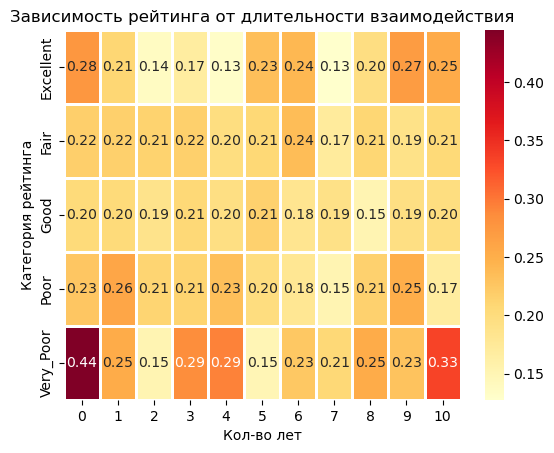

In [ ]:

credit_exit = score_df.pivot_table(values='Exited',
                                   index='CreditScoreCat',
                                   columns='Tenure',
                                   aggfunc='mean')

tenure_heatmap = sns.heatmap(
                            credit_exit,
                            linewidth=1,
                            linecolor='w',
                            cmap='YlOrRd',
                            fmt='.2f',
                            annot=True
                            )
tenure_heatmap.set_title('Зависимость рейтинга от длительности взаимодействия');
tenure_heatmap.set_xlabel('Кол-во лет');
tenure_heatmap.set_ylabel('Категория рейтинга');


Чаще всего уходят клиенты с категорией рейтинга Very_Poor, причем нпибольее часто уходят новые клиенты, и те кто взаимодействовали 10, но кредитный рецтинг которых так и не вырос.